In [ ]:
from google.colab import files
from google.colab import drive 
drive.mount("/drive")
uploaded = files.upload()

Mounted at /drive


Saving item_categories.csv to item_categories.csv
Saving items.csv to items.csv
Saving sales_train.csv to sales_train.csv
Saving sample_submission.csv to sample_submission.csv
Saving shops.csv to shops.csv
Saving test.csv to test.csv


In [ ]:
import pandas as pd
train_df = pd.read_csv('sales_train.csv')
items_df = pd.read_csv('items.csv')
items_df.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
items_df = pd.read_csv('items.csv')
shop_df = pd.read_csv('shops.csv')
item_categories_df = pd.read_csv('item_categories.csv')
item_categories_df.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
category_types = []
index = 0
currentType = item_categories_df.item_category_name[0].split(' ')[0]
for category in item_categories_df.item_category_name:
  if category.split(' ')[0] != currentType:
    currentType = category.split(' ')[0]
    index+=1
  category_types.append(index)
item_categories_df['item_type'] = category_types
items_df = items_df.join(item_categories_df.set_index('item_category_id'), on='item_category_id').drop(columns=['item_category_name', 'item_name'])
items_df



,item_id,item_category_id,item_type
0,0,40,7
1,1,76,11
2,2,40,7
3,3,40,7
4,4,40,7
...,...,...,...
22165,22165,31,5
22166,22166,54,8
22167,22167,49,8
22168,22168,62,10


In [ ]:
shop_types = []
current_shoptype = shop_df.shop_name[0].split(' ')[0]
index = 0
for shop_name in shop_df.shop_name:
  if shop_name.split(' ')[0] != current_shoptype:
    index += 1
    current_shoptype = shop_name.split(' ')[0]
  shop_types.append(index)
shop_df["shop_type"] = shop_types
shop_df=shop_df.drop(columns=["shop_name"])
shop_df

,shop_id,shop_type
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3
5,5,4
6,6,5
7,7,5
8,8,5
9,9,6


In [ ]:
df = train_df.join(items_df.set_index('item_id'), on='item_id').drop(columns=['date_block_num'])
df = df.join(shop_df.set_index('shop_id'), on='shop_id')
df

,date,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_type,shop_type
0,02.01.2013,59,22154,999.00,1.0,37,7,31
1,03.01.2013,25,2552,899.00,1.0,58,9,14
2,05.01.2013,25,2552,899.00,-1.0,58,9,14
3,06.01.2013,25,2554,1709.05,1.0,58,9,14
4,15.01.2013,25,2555,1099.00,1.0,56,9,14
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,25,7409,299.00,1.0,55,9,14
2935845,09.10.2015,25,7460,299.00,1.0,55,9,14
2935846,14.10.2015,25,7459,349.00,1.0,55,9,14
2935847,22.10.2015,25,7440,299.00,1.0,57,9,14


In [ ]:
df[(df.item_id==11373) &(df.shop_id ==12)].sort_values(by="item_cnt_day")

,date,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_type,shop_type
58323,08.01.2013,12,11373,1000.000000,1.0,9,3,8
1398773,04.02.2014,12,11373,359.000000,1.0,9,3,8
1398752,14.02.2014,12,11373,443.000000,1.0,9,3,8
1398738,17.02.2014,12,11373,795.000000,1.0,9,3,8
2531985,05.03.2015,12,11373,1240.000000,1.0,9,3,8
...,...,...,...,...,...,...,...,...
1058343,29.11.2013,12,11373,72.200000,105.0,9,3,8
2608348,16.04.2015,12,11373,120.120370,108.0,9,3,8
1058340,22.11.2013,12,11373,102.466942,242.0,9,3,8
2626181,19.05.2015,12,11373,155.192950,539.0,9,3,8


In [ ]:
test_df = pd.read_csv("test.csv")
df['date'] =  pd.to_datetime(df.date,format='%d.%m.%Y')
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['month_block_count'] = (df.year-2013)*12+df.month-1
df = df[df['shop_id'].isin(test_df.shop_id.unique())]

df['first_sale_month_block'] = df.date.dt.dayofyear//30
df['first_sale_month_block'] += 12 * (df.year-2013)
df['first_sale_month_block'] = df.groupby('item_id')['first_sale_month_block'].transform('min').astype('int16')
df['revenue'] = df.item_cnt_day * df.item_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df

,date,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_type,shop_type,month,year,month_block_count,first_sale_month_block,revenue
0,2013-01-02,59,22154,999.00,1.0,37,7,31,1,2013,0,0,999.00
1,2013-01-03,25,2552,899.00,1.0,58,9,14,1,2013,0,0,899.00
2,2013-01-05,25,2552,899.00,-1.0,58,9,14,1,2013,0,0,-899.00
3,2013-01-06,25,2554,1709.05,1.0,58,9,14,1,2013,0,0,1709.05
4,2013-01-15,25,2555,1099.00,1.0,56,9,14,1,2013,0,0,1099.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,1.0,55,9,14,10,2015,33,33,299.00
2935845,2015-10-09,25,7460,299.00,1.0,55,9,14,10,2015,33,25,299.00
2935846,2015-10-14,25,7459,349.00,1.0,55,9,14,10,2015,33,0,349.00
2935847,2015-10-22,25,7440,299.00,1.0,57,9,14,10,2015,33,26,299.00


In [ ]:
new_df=df.groupby(["shop_id", "item_id", "month_block_count"]).agg({"item_cnt_day":"sum", "item_price":"mean","revenue":"sum", "first_sale_month_block":"min", "month":"min", "shop_type":"min",
                                                              "item_type":"min", "item_category_id":"min"}).reset_index().rename(columns={"item_cnt_day":"item_cnt_month"})
new_df

,shop_id,item_id,month_block_count,item_cnt_month,item_price,revenue,first_sale_month_block,month,shop_type,item_type,item_category_id
0,2,27,0,1.0,2499.0,2499.0,0,1,1,5,19
1,2,27,17,1.0,498.0,498.0,0,6,1,5,19
2,2,30,2,1.0,359.0,359.0,1,3,1,7,40
3,2,30,5,1.0,399.0,399.0,1,6,1,7,40
4,2,30,15,1.0,169.0,169.0,1,4,1,7,40
...,...,...,...,...,...,...,...,...,...,...,...
1323790,59,22164,27,2.0,699.0,1398.0,25,4,31,7,37
1323791,59,22164,30,1.0,699.0,699.0,25,7,31,7,37
1323792,59,22167,9,1.0,299.0,299.0,8,10,31,8,49
1323793,59,22167,11,2.0,299.0,598.0,8,12,31,8,49


In [ ]:
#Data Prepartion 
key_df = new_df.groupby(["shop_id", "item_id"]).agg({"first_sale_month_block":"min","shop_type": "min",
                                                     "item_type":"min",	"item_category_id": "min"}).reset_index()
import copy 
last_month_df = None
predict_df = None
predict_df_2 = None
last_month_df_2 = None
for month_block_count in range(0,31):
  cur_keys = key_df[key_df.first_sale_month_block <= month_block_count]
  df1, df2, df3, df4, df5 = (new_df[(new_df.month_block_count==month_block_count)], 
                            new_df[(new_df.month_block_count==month_block_count+1)], 
                            new_df[(new_df.month_block_count==month_block_count+2)],
                            new_df[(new_df.month_block_count==month_block_count+3)],
                            new_df[(new_df.month_block_count==month_block_count+4)])
  agg_df = new_df[(new_df.month_block_count <= month_block_count)].groupby(["shop_id", "item_id"]).agg({"item_cnt_month": "sum",
                                                                                                        "first_sale_month_block":"min",
                                                                                                        "month_block_count": "max"}).reset_index()
  agg_df = agg_df.rename(columns={"item_cnt_month" : "item_average_month"})
  agg_df.item_average_month /= (month_block_count + 1 - agg_df.first_sale_month_block)

  df1 = df1[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_1", "item_cnt_month":"item_cnt_month_1"})
  df2 = df2[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_2", "item_cnt_month":"item_cnt_month_2"})
  df3 = df3[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_3", "item_cnt_month":"item_cnt_month_3"})
  df4 = df4[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_4", "item_cnt_month":"item_cnt_month_4"})
  df5 = df5[["shop_id", "item_id", "item_cnt_month", "revenue"]]

  df1 = df1.merge(df2,  on=['shop_id', 'item_id'], how="outer").merge(
      df3, on=['shop_id', 'item_id'], how="outer").merge(
          df4, on=['shop_id', 'item_id'], how="outer").merge(
              df5, on=['shop_id', 'item_id'], how="outer").fillna(0)
  cur_df = cur_keys.merge(df1, on=['shop_id', 'item_id'], how="left").fillna(0)
  cur_df = cur_df.merge(agg_df.drop(columns=["first_sale_month_block"]), on=['shop_id', 'item_id'], how="left").fillna(0)
  if predict_df is None:
    predict_df = cur_df
  elif month_block_count == 30:
    last_month_df = cur_df
  else:
    if month_block_count == 29:
      predict_df_2 = copy.deepcopy(predict_df)
      last_month_df_2 = cur_df
    predict_df.append(cur_df)
  
predict_df.sort_values(by="item_average_month")

,shop_id,item_id,first_sale_month_block,shop_type,item_type,item_category_id,item_cnt_month_1,revenue_1,item_cnt_month_2,revenue_2,item_cnt_month_3,revenue_3,item_cnt_month_4,revenue_4,item_cnt_month,revenue,item_average_month,month_block_count
20621,12,1590,0,8,5,29,-13.0,-33787.00,1.0,2599.0,1.0,2599.0,0.0,0.0,0.0,0.0,-13.0,0.0
20623,12,1593,0,8,5,29,-6.0,-10794.00,-1.0,-1799.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0
122237,56,13102,0,29,1,4,-2.0,-2780.00,2.0,2780.0,0.0,0.0,0.0,0.0,2.0,1998.0,-2.0,0.0
134848,59,14931,0,31,10,69,-2.0,-1398.00,9.0,4167.0,5.0,3215.0,2.0,1398.0,2.0,1398.0,-2.0,0.0
89832,42,5602,0,20,1,5,-1.0,-899.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71460,31,13598,0,14,10,71,72.0,720.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0
73389,31,19811,0,14,7,40,89.0,30850.80,82.0,28618.0,34.0,11866.0,12.0,4188.0,8.0,2792.0,89.0,0.0
72286,31,16450,0,14,7,40,116.0,46280.76,13.0,5187.0,9.0,3591.0,4.0,1596.0,4.0,1596.0,116.0,0.0
56931,25,16450,0,14,7,40,125.0,49875.00,33.0,13167.0,17.0,6783.0,3.0,1197.0,1.0,399.0,125.0,0.0


(array([2.360763e+06, 3.009400e+04, 6.772000e+03, 5.524000e+03,
        2.487000e+03, 2.635000e+03, 2.499000e+03, 1.895000e+03,
        4.250000e+02, 1.180000e+02]),
 array([7.0000000e-02, 3.4990630e+03, 6.9980560e+03, 1.0497049e+04,
        1.3996042e+04, 1.7495035e+04, 2.0994028e+04, 2.4493021e+04,
        2.7992014e+04, 3.1491007e+04, 3.4990000e+04]),
 <a list of 10 Patch objects>)

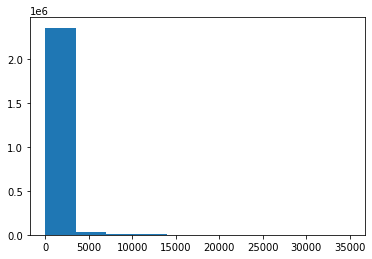

In [ ]:
import matplotlib.pyplot as plt
df_plot = df[df.item_price < 35000]
plt.hist(df_plot.item_price)

(array([1362610.,  493704.,  209896.,  123104.,   53877.,   91564.,
          26009.,   15367.,    4609.,    3928.]),
 array([7.000000e-02, 4.999870e+02, 9.999040e+02, 1.499821e+03,
        1.999738e+03, 2.499655e+03, 2.999572e+03, 3.499489e+03,
        3.999406e+03, 4.499323e+03, 4.999240e+03]),
 <a list of 10 Patch objects>)

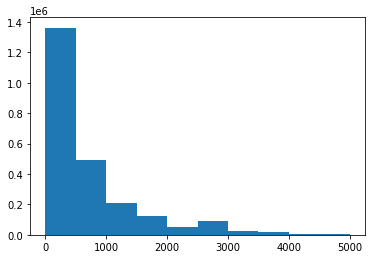

In [ ]:
plt.clf()
df_plot = df_plot[df_plot.item_price < 5000]
plt.hist(df_plot.item_price)

[Text(0.5, 0, 'item cnt day')]

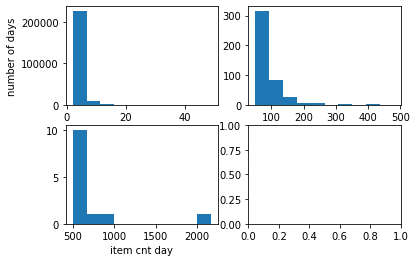

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0][0].hist(df[(df.item_cnt_day > 1) & (df.item_cnt_day < 50)].item_cnt_day)
ax[0][1].hist(df[(df.item_cnt_day < 500) & (df.item_cnt_day >= 50)].item_cnt_day)
ax[1][0].hist(df[df.item_cnt_day >= 500].item_cnt_day)
ax[0][0].set( ylabel="number of days")
ax[1][0].set(xlabel="item cnt day")


In [ ]:
#baseline
baseline = new_df.groupby(["shop_id", "item_id"]).agg({"item_cnt_month":"sum"}).reset_index()
baseline.item_cnt_month /= 34
baseline = baseline[baseline.item_id.isin(test_df.item_id)]
baseline = test_df.merge(baseline, on=['shop_id', 'item_id'], how='left').fillna(0)[["ID", "item_cnt_month"]]
baseline.to_csv("C:\\Users\\yuhao\\Desktop\\439project\\baseline.csv", index=False)

In [ ]:
print(last_month_df.item_cnt_month.nunique())
print(predict_df.columns)
last_month_df


1
Index(['shop_id', 'item_id', 'first_sale_month_block', 'shop_type',
       'item_type', 'item_category_id', 'item_cnt_month_1', 'revenue_1',
       'item_cnt_month_2', 'revenue_2', 'item_cnt_month_3', 'revenue_3',
       'item_cnt_month_4', 'revenue_4', 'item_cnt_month', 'revenue',
       'item_average_month', 'month_block_count'],
      dtype='object')


,shop_id,item_id,first_sale_month_block,shop_type,item_type,item_category_id,item_cnt_month_1,revenue_1,item_cnt_month_2,revenue_2,item_cnt_month_3,revenue_3,item_cnt_month_4,revenue_4,item_cnt_month,revenue,item_average_month,month_block_count
0,2,27,0,1,5,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064516,17.0
1,2,30,1,1,7,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,16.0
2,2,31,1,1,7,37,0.0,0.0,0.0,0.0,0.0,0.0,1.0,399.0,0.0,0.0,0.233333,16.0
3,2,32,0,1,7,40,0.0,0.0,1.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322581,26.0
4,2,33,0,1,7,37,1.0,199.0,0.0,0.0,1.0,199.0,0.0,0.0,0.0,0.0,0.322581,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327252,59,22154,0,31,7,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,0.0
327253,59,22155,3,31,7,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,6.0
327254,59,22162,18,31,7,40,0.0,0.0,1.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,1.153846,28.0
327255,59,22164,25,31,7,37,1.0,699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,30.0


In [ ]:
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

shop_id = Input(shape = [np.max(predict_df.shop_id)])
shop_type = Input(shape = [np.max(predict_df.shop_type)])
item_type = Input(shape = [np.max(predict_df.item_type)])
item_category_id = Input(shape = [np.max(predict_df.item_category_id)])
revenues_layer = Input(shape = [4])
item_counts = Input(shape = [5])
layer1 = Dense(32, activation = 'relu')(shop_id)
layer2 = Dense(32, activation = 'relu')(shop_type)
layer3 = Dense(32, activation = 'relu')(item_type)
layer4 = Dense(32, activation = 'relu')(item_category_id)
layer5 = Dense(64, activation = 'relu')(revenues_layer)
layer6 = Dense(64, activation = 'relu')(item_counts)
shop1 = Concatenate()([layer1, layer2])
item1 = Concatenate()([layer3, layer4])
bel1 = Dense(32, activation = 'relu')(shop1)
bel2 = Dense(32, activation = 'relu')(item1)
summary_layer = Concatenate()([bel1, bel2, layer5, layer6])
final_layer_1 = Dense(64, activation = 'relu')(summary_layer)
final_layer_2 = Dense(16, activation = 'relu')(final_layer_1)
output_layer= Dense(1, activation='linear')(final_layer_2)

model = Model(inputs=[shop_id, shop_type, item_type, item_category_id, revenues_layer, item_counts], outputs=output_layer)
model.compile(loss="mse", optimizer=Adam(lr=0.0001))
target = predict_df.item_cnt_month.values
features = predict_df.drop(columns=["item_id", "revenue",  "item_cnt_month"]).values

print(model.input_shape)
s_ids = features[:, 0].astype(int) - 1;
s_type = features[:, 2].astype(int) - 1;
i_type = features[:, 3].astype(int) - 1;
i_category_id = features[:, 4].astype(int) - 1;
revenues_arr = features[:, [6,8,10,12]]
item_counts_arr = features[:, [5,7,9,11,13]]
s_id_arr, s_type_arr, i_type_arr, i_category_id_arr = (
      np.zeros((len(features), np.max(predict_df.shop_id))), 
      np.zeros((len(features), np.max(predict_df.shop_type))), 
      np.zeros((len(features), np.max(predict_df.item_type))), 
      np.zeros((len(features), np.max(predict_df.item_category_id))))
s_id_arr[s_ids] = 1
s_type_arr[s_type] = 1
i_type_arr[i_type] = 1
i_category_id_arr[i_category_id] = 1
input =[s_id_arr, s_type_arr, i_type_arr, i_category_id_arr, revenues_arr, item_counts_arr]
from keras.callbacks import History 
history = History()
model.fit(input,  target, verbose=1, batch_size=256, epochs=2500, callbacks=[history], shuffle=True)
print(history.history)

X = last_month_df.drop(columns=["item_id", "revenue", "item_cnt_month"]).values
s_ids = X[:, 0].astype(int) - 1;
s_type = X[:, 2].astype(int) - 1;
i_type = X[:, 3].astype(int) - 1;
i_category_id = X[:, 4].astype(int) - 1;
revenues_arr = X[:, [6,8,10,12]]
item_counts_arr = X[:, [5,7,9,11,13]]
s_id_arr, s_type_arr, i_type_arr, i_category_id_arr = (
      np.zeros((len(X), np.max(predict_df.shop_id))), 
      np.zeros((len(X), np.max(predict_df.shop_type))), 
      np.zeros((len(X), np.max(predict_df.item_type))), 
      np.zeros((len(X), np.max(predict_df.item_category_id))))
s_id_arr[s_ids] = 1
s_type_arr[s_type] = 1
i_type_arr[i_type] = 1
i_category_id_arr[i_category_id] = 1
input =[s_id_arr, s_type_arr, i_type_arr, i_category_id_arr, revenues_arr, item_counts_arr]
y = model.predict(input)
print(y)

X_test = last_month_df_2.drop(columns=["item_id", "revenue", "item_cnt_month"]).values
s_ids = X_test[:, 0].astype(int) - 1;
s_type = X_test[:, 2].astype(int) - 1;
i_type = X_test[:, 3].astype(int) - 1;
i_category_id = X_test[:, 4].astype(int) - 1;
revenues_arr = X_test[:, [6,8,10,12]]
item_counts_arr = X_test[:, [5,7,9,11,13]]



Streaming output truncated to the last 5000 lines.
Epoch 5/2500
531/531 [==============================] - 2s 3ms/step - loss: 101.2465
Epoch 6/2500
531/531 [==============================] - 2s 3ms/step - loss: 71.0723
Epoch 7/2500
531/531 [==============================] - 2s 3ms/step - loss: 54.4490
Epoch 8/2500
531/531 [==============================] - 2s 3ms/step - loss: 39.3194
Epoch 9/2500
531/531 [==============================] - 2s 3ms/step - loss: 48.6365
Epoch 10/2500
531/531 [==============================] - 2s 3ms/step - loss: 59.5403
Epoch 11/2500
531/531 [==============================] - 2s 3ms/step - loss: 54.7849
Epoch 12/2500
531/531 [==============================] - 2s 3ms/step - loss: 31.4809
Epoch 13/2500
531/531 [==============================] - 2s 3ms/step - loss: 38.7242
Epoch 14/2500
531/531 [==============================] - 2s 4ms/step - loss: 50.6391
Epoch 15/2500
531/531 [==============================] - 2s 3ms/step - loss: 42.0012
Epoch 16/2500
531/

In [ ]:
cnt = y.reshape(1, len(y))[0]
last_month_df.item_cnt_month = cnt
ann_df = test_df.merge(last_month_df, on=['shop_id', 'item_id'], how='left').fillna(0)[["ID", "item_cnt_month"]]
ann_df.item_cnt_month = ann_df.item_cnt_month.clip(0,20)
ann_df.to_csv("C:\\Users\\yuhao\\Desktop\\439project\\neural_network.csv", index=False)

In [ ]:
s_id_arr, s_type_arr, i_type_arr, i_category_id_arr = (
      np.zeros((len(X_test), np.max(predict_df.shop_id))), 
      np.zeros((len(X_test), np.max(predict_df.shop_type))), 
      np.zeros((len(X_test), np.max(predict_df.item_type))), 
      np.zeros((len(X_test), np.max(predict_df.item_category_id))))
s_id_arr[s_ids] = 1
s_type_arr[s_type] = 1
i_type_arr[i_type] = 1
i_category_id_arr[i_category_id] = 1
input =[s_id_arr, s_type_arr, i_type_arr, i_category_id_arr, revenues_arr, item_counts_arr]
y_test = model.predict(input)
print(y_test)
print("RMSE for October (ANN):", (np.sum((last_month_df_2.item_cnt_month - y_test)**2)/len(y_test))**0.5)

[[ 1.767227  ]
 [ 0.01897928]
 [ 0.0162234 ]
 ...
 [ 0.20827487]
 [ 0.15817454]
 [-0.21233395]]


In [ ]:
#Linear Regression
# #Data Preperation
# key_df = new_df.groupby(["shop_id", "item_id"]).agg({"first_sale_month_block":"min","shop_type": "min",
#                                                      "item_type":"min",	"item_category_id": "min"}).reset_index()
# import copy 
# predict_df = None
# last_month_df = None
# predict_df_2 = None
# last_month_df_2 = None
# for month_block_count in range(0,31):
#   cur_keys = key_df[key_df.first_sale_month_block <= month_block_count]
#   df1, df2, df3, df4, df5 = (new_df[(new_df.month_block_count==month_block_count)], 
#                             new_df[(new_df.month_block_count==month_block_count+1)], 
#                             new_df[(new_df.month_block_count==month_block_count+2)],
#                             new_df[(new_df.month_block_count==month_block_count+3)],
#                             new_df[(new_df.month_block_count==month_block_count+4)])
#   agg_df = new_df[(new_df.month_block_count <= month_block_count)].groupby(["shop_id", "item_id"]).agg({"item_cnt_month": "sum",
#                                                                                                         "first_sale_month_block":"min",
#                                                                                                         "month_block_count": "max"}).reset_index()
#   agg_df = agg_df.rename(columns={"item_cnt_month" : "item_average_month"})
#   agg_df.item_average_month /= (month_block_count + 1 - agg_df.first_sale_month_block)

#   df1 = df1[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_1", "item_cnt_month":"item_cnt_month_1"})
#   df2 = df2[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_2", "item_cnt_month":"item_cnt_month_2"})
#   df3 = df3[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_3", "item_cnt_month":"item_cnt_month_3"})
#   df4 = df4[["shop_id", "item_id", "item_cnt_month", "revenue"]].rename(columns={"revenue":"revenue_4", "item_cnt_month":"item_cnt_month_4"})
#   df5 = df5[["shop_id", "item_id", "item_cnt_month", "revenue"]]

#   df1 = df1.merge(df2,  on=['shop_id', 'item_id'], how="outer").merge(
#       df3, on=['shop_id', 'item_id'], how="outer").merge(
#           df4, on=['shop_id', 'item_id'], how="outer").merge(
#               df5, on=['shop_id', 'item_id'], how="outer").fillna(0)
#   cur_df = cur_keys.merge(df1, on=['shop_id', 'item_id'], how="left").fillna(0)
#   cur_df = cur_df.merge(agg_df.drop(columns=["first_sale_month_block"]), on=['shop_id', 'item_id'], how="left").fillna(0)
#   if predict_df is None:
#     predict_df = cur_df
#   elif month_block_count == 30:
#     last_month_df = cur_df
#   else:
#     if month_block_count == 29:
#       predict_df_2 = copy.deepcopy(predict_df)
#       last_month_df_2 = cur_df
#     predict_df.append(cur_df)
# import numpy as np
# predict_df.sort_values(by="item_average_month")

#Build Model
from sklearn.linear_model import LinearRegression
target = predict_df.item_cnt_month.values
features = predict_df.drop(columns=["item_id", "revenue", "shop_id", "item_cnt_month", "shop_type", "item_type" ,"item_category_id", "month_block_count"]).values
reg = LinearRegression().fit(features, target)
features2 = predict_df_2.drop(columns=["item_id", "revenue", "shop_id", "item_cnt_month", "shop_type", "item_type" ,"item_category_id", "month_block_count"]).values
reg2 = LinearRegression().fit(features2, predict_df_2.item_cnt_month.values)

#Model Evaluation
X_test = last_month_df_2.drop(columns=["item_id", "shop_id", "revenue", "item_cnt_month", "shop_type", "item_type" ,"item_category_id", "month_block_count"]).values
y_test = reg2.predict(X_test)
last_month_df_2.item_cnt_month = last_month_df_2.item_cnt_month.clip(0,20)
y_test = y_test.clip(0,20)
print("RMSE for October:", (np.sum((last_month_df_2.item_cnt_month - y_test)**2)/len(y_test))**0.5)

#Prediction
X = last_month_df.drop(columns=["item_id", "shop_id", "revenue", "item_cnt_month", "shop_type", "item_type" ,"item_category_id", "month_block_count"]).values
y = reg.predict(X)
last_month_df.item_cnt_month = y
linear_regression_df = test_df.merge(last_month_df, on=['shop_id', 'item_id'], how='left').fillna(0)[["ID", "item_cnt_month"]]
linear_regression_df.item_cnt_month = linear_regression_df.item_cnt_month.clip(0,20)
linear_regression_df.to_csv("C:\\Users\\yuhao\\Desktop\\439project\\linear_regression.csv", index=False)

